# Solution of Heat Diffusion Equation in 1D (1)
Storing solution for all times

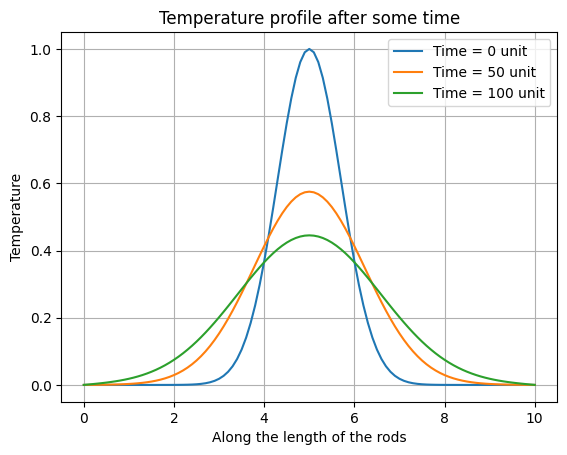

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L=10                     #Length of rod
Space_interval=100
dx=L/Space_interval
Time_interval=10000
T=4.4*10**5              #Final Time
dt=T/Time_interval
alpha2=0.000023          #Diffusion Constant
cnt=(alpha2)*dt/(dx**2)  #For numerical stability (Neumann Stability) this factor needs to be less than 0.5

x=np.linspace(0,L,Space_interval+1)
u=np.empty((Space_interval+1,Time_interval+1))           
for i in range(1,Space_interval):              #For Space_interval points, the index runs from 1 to Space_interval-1
    u[i][0]=np.exp(-(x[i]-5)**2)               #Initial Condition set for each of the space points except boundaries 
    #u[i][0]=np.sin(np.pi*x[i])
    #u[i][0]=np.cos(np.pi/2*x[i])

#Boundary Condition
u[0][0]=0
u[Space_interval][0]=0

#Updating the array by time loop
for k in range(Time_interval):                 #Updates all time points except t=0   
    u[0][k+1]=0        
    u[Space_interval][k+1]=0
    for i in range(1,Space_interval):          #Includes interior points only
        u[i][k+1]=u[i][k]+cnt*(u[i+1][k]-2*u[i][k]+u[i-1][k])
    
        
#PLotting
plt.plot(x,u[:,0],label='Time = 0 unit')
plt.plot(x,u[:,500],label='Time = 50 unit')
plt.plot(x,u[:,1000],label='Time = 100 unit')
plt.xlabel('Along the length of the rods')
plt.ylabel('Temperature')
plt.title('Temperature profile after some time')
plt.legend()
plt.grid()
plt.show()

# Solution of Heat Diffusion Equation in 1D (2)
Updating previous solutions

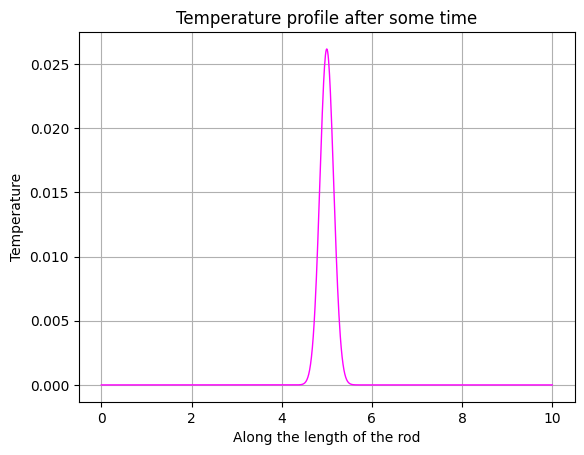

In [21]:
import numpy as np
import matplotlib.pyplot as plt

L=10                     #Length of rod
Space_interval=1000
dx=L/Space_interval
Time_interval=10000
T=500                    #Final Time
dt=T/Time_interval
alpha2=0.000023          #Diffusion Constant
cnt=(alpha2)*dt/(dx**2)  #For numerical stability (Neumann Stability) this factor needs to be less than 0.5

x=np.linspace(0,L,Space_interval+1)
u=np.zeros(Space_interval+1)           #Boundary condition upon which the array will be updated as time passes from recursion relation
u[len(x)//2]=1                                #Initial Condition (midpoint heating)


#Updating the array by time loop
for j in range(Time_interval):     
    for i in range(1,Space_interval):
        u[i]=u[i]+cnt*(u[i+1]-2*u[i]+u[i-1])
    
        
#PLotting
plt.plot(x,u,color='magenta',lw=1)          
plt.xlabel('Along the length of the rod')
plt.ylabel('Temperature')
plt.title('Temperature profile after some time')
plt.grid()
plt.show()

# Solution of 1D Heat Diffusion Equation and compare with exact solution

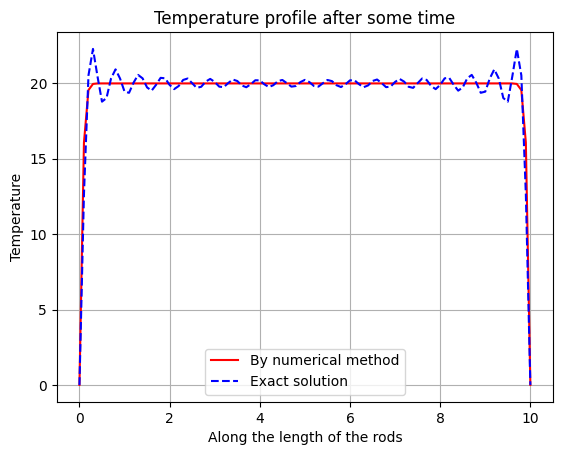

In [27]:
import numpy as np
import matplotlib.pyplot as plt

L=10                     #Length of rod
Space_interval=100
dx=L/Space_interval
Time_interval=100000
T=107                    #Final Time
dt=T/Time_interval
alpha2=0.000023          #Diffusion Constant
cnt=(alpha2)*dt/(dx**2)  #For numerical stability (Neumann Stability) this factor needs to be less than 0.5
T0=20                    #Initial Temperature

x=np.linspace(0,L,Space_interval+1)
u=T0*np.ones((Space_interval+1))                 #Initial Condition        
u[0],u[Space_interval]=0,0                       #Boundary Condition              

#Updating the array by time loop
for j in range(Time_interval):     
    for i in range(1,Space_interval):
        u[i]=u[i]+cnt*(u[i+1]-2*u[i]+u[i-1])
        
    
#Exact result
t=107
f=lambda m:4*T0/(np.pi*(2*m-1))*np.sin((2*m-1)*np.pi*x/L)*np.exp(-((2*m-1)*np.pi/L)**2*alpha2*t)
Exact_solution=sum([f(m) for m in range(1,20)])    
        
#PLotting
plt.plot(x,u,'r',label='By numerical method')
plt.plot(x,Exact_solution,'b--',label='Exact solution')
plt.legend()
plt.xlabel('Along the length of the rods')
plt.ylabel('Temperature')
plt.title('Temperature profile after some time')
plt.grid()
plt.show()

# 3D Plotting of solution Heat Diffusion in 1D 

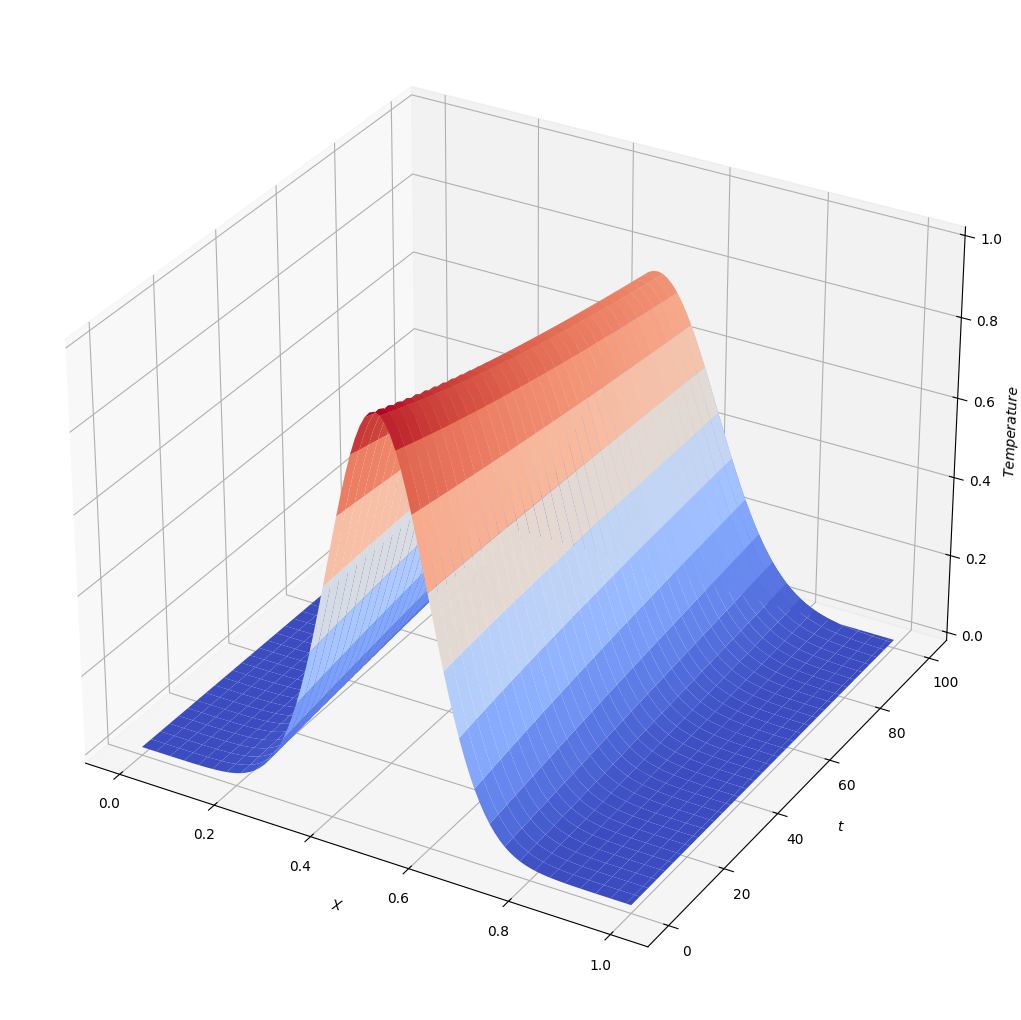

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm          #scalar mapable to create colorbar

#Parameters of system with boundary conditions
x=np.linspace(0,1,101)
t=np.linspace(0,100,101)
u=np.zeros((101,101))        

#Initial Condition
u[0]=np.exp(-((x-0.5)**2)/0.02)

for j in range(1,100):    #Updates all time points except t=0
    u[j]=u[j-1]           #simply copies the solution at previous time to the solution at next time which is going to be updated. This is done simply because the way iteration formula is written   
    for i in range(1,100):
        u[j,i]=u[j,i]+(u[j,i+1]-2*u[j,i]+u[j,i-1])/4
        

#3D PLotting 
X,T=np.meshgrid(x,t,sparse=True)
fig=plt.figure(figsize=(13,13))
ax=plt.axes(projection='3d')
ax.plot_surface(X,T,u,cmap=cm.coolwarm)
ax.set_xlabel('$X$',fontsize=10,rotation=170)
ax.set_ylabel('$t$',fontsize=10)
ax.set_zlabel('$Temperature$',fontsize=10,rotation=60)
plt.show() 

# Solution of 1D Wave equation for a stretched plucked string

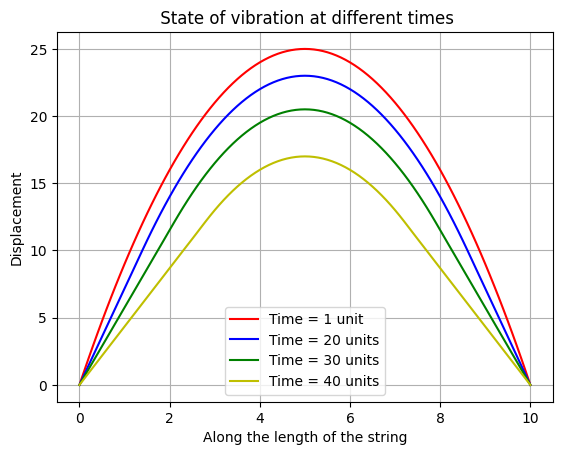

In [42]:
import numpy as np
import matplotlib.pyplot as plt

L=10                      #Length of string
Space_interval=100
Time_interval=100
C2=0.5                    #Courant Number 0<C2<1

x=np.linspace(0,L,Space_interval+1)
u=np.zeros((Space_interval+1,Time_interval+1))            

for i in range(1,Space_interval):     #For Space_interval points, the index runs from 1 to Space_interval-1
    u[i,0]=x[i]*(L-x[i])              #Initial Condition set for each of the space points except boundaries

#Initialization for the iterative step from taylor expansion of 'u' wrt time assuming initial velocity is zero
for i in range(1,Space_interval):     #Loop at iteration j=0 (t=0)
    u[i,1]=u[i,0]+0.5*C2*(u[i+1,0]+u[i-1,0]-2*u[i,0])

#Updating the array by time loop
for t in range(1,Time_interval):
    u[0][t+1]=0        
    u[Space_interval][t+1]=0
    for i in range(1,Space_interval):
        u[i,t+1]=2*u[i,t]-u[i,t-1]+C2*(u[i+1,t]+u[i-1,t]-2*u[i,t])
    
        
#PLotting
plt.plot(x,u[:,1],'r',label='Time = 1 unit')
plt.plot(x,u[:,20],'b',label='Time = 20 units')
plt.plot(x,u[:,30],'g',label='Time = 30 units')
plt.plot(x,u[:,40],'y',label='Time = 40 units')
plt.legend()
plt.xlabel('Along the length of the string')
plt.ylabel('Displacement')
plt.title(' State of vibration at different times')
plt.grid()
plt.show()

# Solution of 1D Wave equation for a stretched plucked string

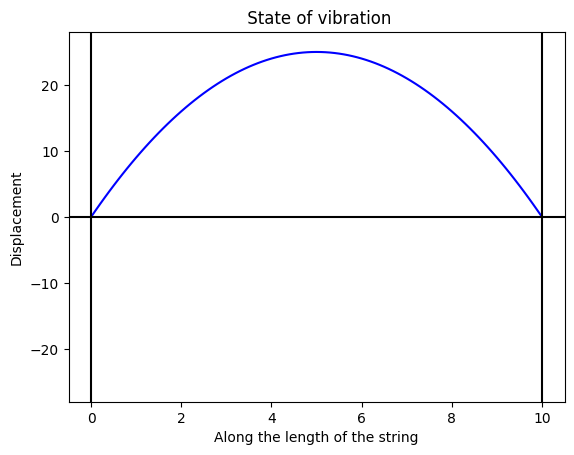

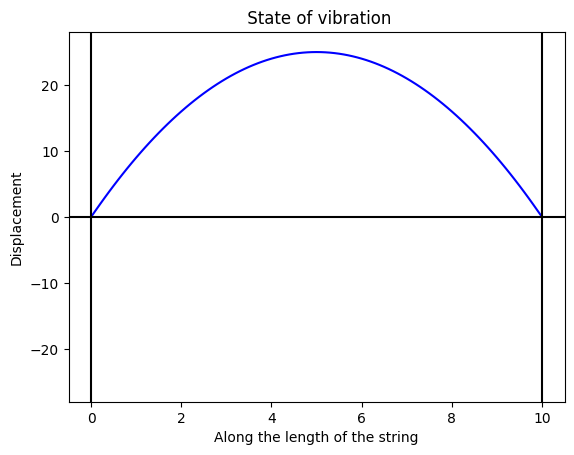

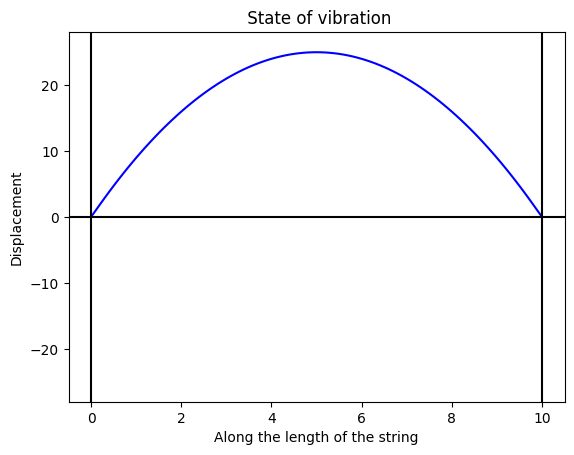

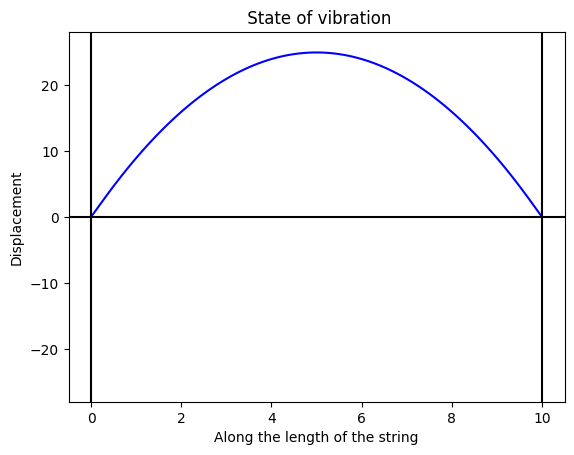

In [46]:
import numpy as np
import matplotlib.pyplot as plt

L=10                      #Length of string
Space_interval=100
Time_interval=5
C2=0.5                    #Courant Number 0<C2<1

x=np.linspace(0,L,Space_interval+1)
u=np.zeros((Space_interval+1,Time_interval+1))            

for i in range(1,Space_interval):     #For Space_interval points, the index runs from 1 to Space_interval-1
    u[i,0]=x[i]*(L-x[i])              #Initial Condition set for each of the space points except boundaries

#Initialization for the iterative step from taylor expansion of 'u' wrt time assuming initial velocity is zero
for i in range(1,Space_interval):     #Loop at iteration j=0 (t=0)
    u[i,1]=u[i,0]+0.5*C2*(u[i+1,0]+u[i-1,0]-2*u[i,0])

#Updating the array by time loop
for t in range(1,Time_interval):
    u[0][t+1]=0        
    u[Space_interval][t+1]=0
    for i in range(1,Space_interval):
        u[i,t+1]=2*u[i,t]-u[i,t-1]+C2*(u[i+1,t]+u[i-1,t]-2*u[i,t])
    
    plt.cla()
    plt.plot(x,u[:,t],'b',lw=1.5)
    plt.xlabel('Along the length of the string')
    plt.ylabel('Displacement')
    plt.title(' State of vibration')
    plt.ylim(-28,28)
    plt.axhline(color='black')
    plt.axvline(x=0,color='Black')
    plt.axvline(x=L,color='black')
    plt.pause(0.0001)

plt.show()

# Solution of 1D Wave equation for a stretched string generating standing wave

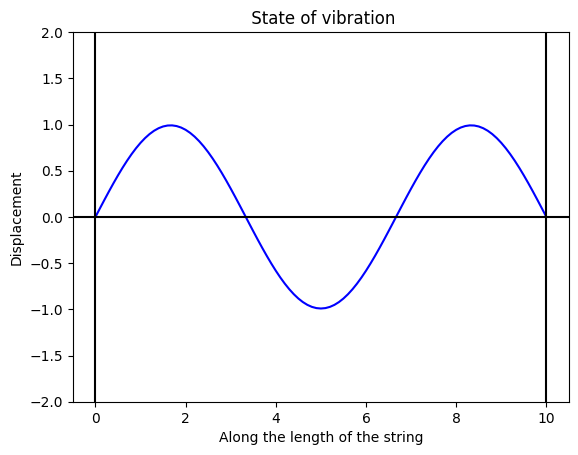

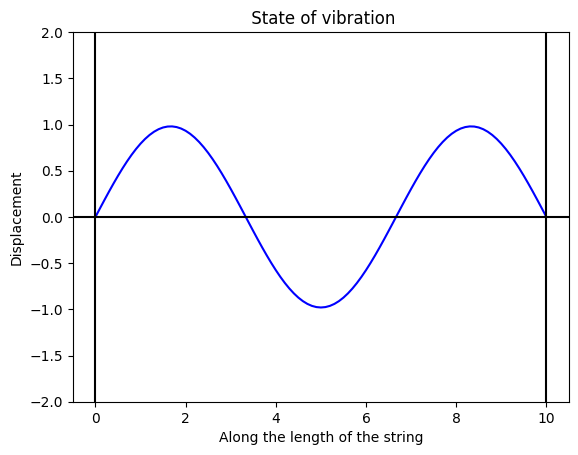

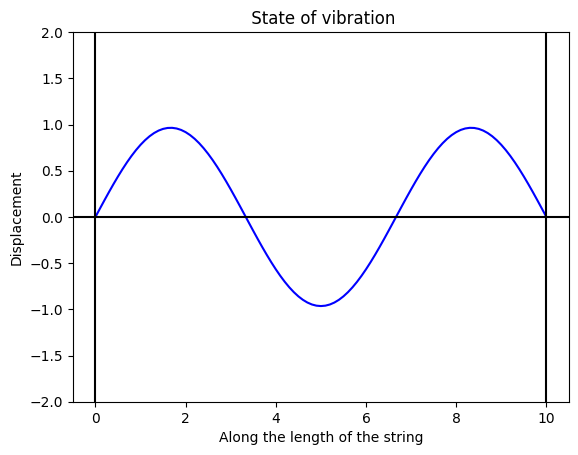

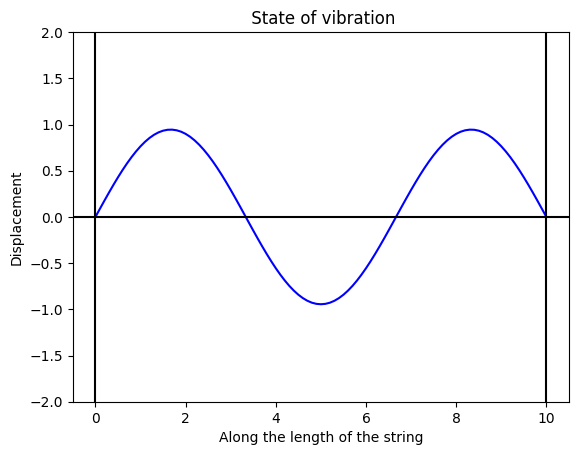

In [47]:
import numpy as np
import matplotlib.pyplot as plt

L=10                      #Length of string
Space_interval=100
Time_interval=5           #only including past,present,future time slices
C2=0.5                    #Courant Number 0<C2<1
n=3                       #number of nodes 

x=np.linspace(0,L,Space_interval+1)
u=np.zeros((Space_interval+1,3))      #u[:,0]=past,u[:,1]=present,u[:,2]=future         

for i in range(1,Space_interval):     #For Space_interval points, the index runs from 1 to Space_interval-1
    u[i,0]=np.sin((n*np.pi/L)*x[i])   #Initial Condition set for each of the space points except boundaries

#Initialization for the iterative step from taylor expansion of 'u' wrt time assuming initial velocity is zero
for i in range(1,Space_interval):     #Loop at iteration j=0 (t=0)
    u[i,1]=u[i,0]+0.5*C2*(u[i+1,0]+u[i-1,0]-2*u[i,0])

#Updating the array by time loop
for t in range(1,Time_interval):
    u[0][2]=0        
    u[Space_interval][2]=0
    for i in range(1,Space_interval):
        u[i,2]=2*u[i,1]-u[i,0]+C2*(u[i+1,1]+u[i-1,1]-2*u[i,1])
    u[:,0]=u[:,1]
    u[:,1]=u[:,2]
    
    
    
    plt.cla()
    plt.plot(x,u[:,2],'b',lw=1.5)
    plt.xlabel('Along the length of the string')
    plt.ylabel('Displacement')
    plt.title(' State of vibration')
    plt.ylim(-2,2)
    plt.axhline(color='black')
    plt.axvline(x=0,color='Black')
    plt.axvline(x=L,color='black')
    plt.pause(0.0001)

plt.show()

# Solution of Laplace's equation in 2D square plane using Gauss Seidel Scheme

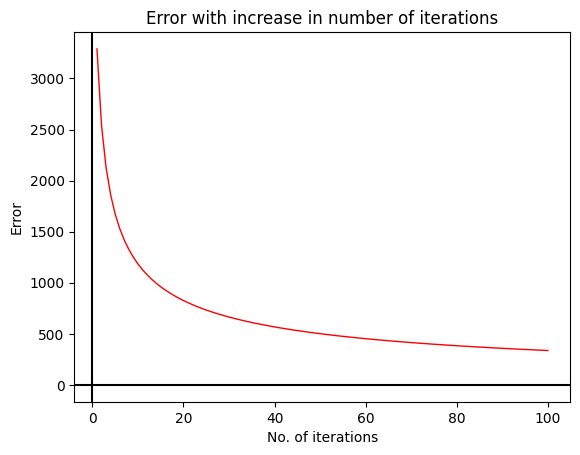

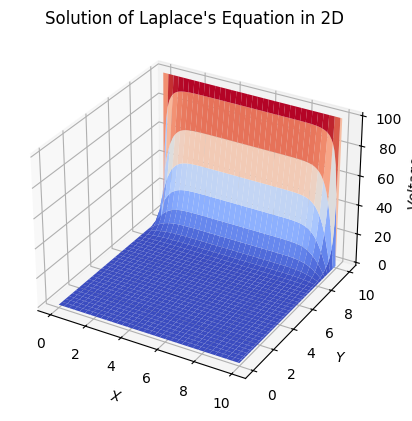

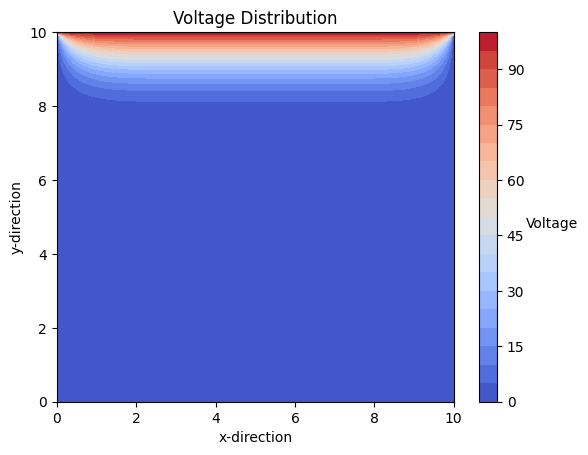

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Total no. of grid points
N=101
iteration=100
L=10                        #Length of the 2D surface
#Boundary and guess conditions (100 Volt defined in top surface)
u=np.zeros((N,N))         
u[N-1,:]=100                #Top surface at 100 V, this is the last row in the matrix since it has the maximum row index which corresponding to top surface in right-handed cartesian coordinate system         		          

E=[]
for _ in range(iteration):
    u0=u.copy()	            #Store old values for error calculation
    
    #updating the array using four nearby points with initial guess and current values of updated points
    for i in range(1,N-1):
        for j in range(1,N-1):
            u[i,j]=0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
			
    err=np.sum(abs(u-u0))
    E.append(err)

#For plotting of the error with iterations
plt.plot(range(1,iteration+1),E,'r-',lw=1)
plt.title('Error with increase in number of iterations')
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()

#3D plotting
x=np.linspace(0,L,N)
y=np.linspace(0,L,N)
X,Y=np.meshgrid(x,y)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,u,cmap='coolwarm')
ax.set_title("Solution of Laplace's Equation in 2D")
ax.set_xlabel('$X$',fontsize=10,rotation=170)
ax.set_ylabel('$Y$',fontsize=10)
ax.set_zlabel('$Voltage$',fontsize=10,rotation=60)
plt.show()


#Contour plotting and colour mapping
colourMap=plt.cm.coolwarm                #colorMap=plt.cm.jet
colorinterpolation=20
plt.title('Voltage Distribution')
x=np.linspace(0,L,N)
y=np.linspace(0,L,N)
X,Y=np.meshgrid(x, y)
X,Y=np.meshgrid(x,y)
plt.xlabel('x-direction')
plt.ylabel('y-direction')
cf=plt.contourf(X,Y,u,colorinterpolation,cmap=colourMap)
cbar=plt.colorbar(cf)
'''
img=plt.imshow(u,cmap='coolwarm',origin='lower',extent=[0,L,0,L])  #cmap='viridis'
plt.colorbar(img,label='Voltage')
'''
cbar.set_label('Voltage',rotation=0,labelpad=20) 
plt.show()

# Solution of Laplace's equation in 2D square plane using Jacobi Scheme
Using Vectorization

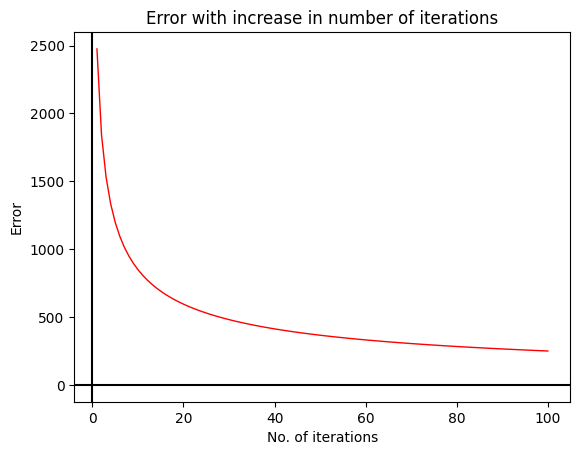

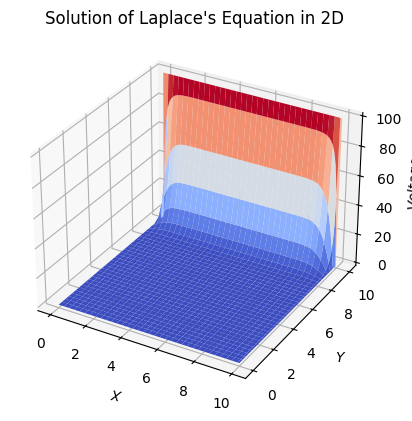

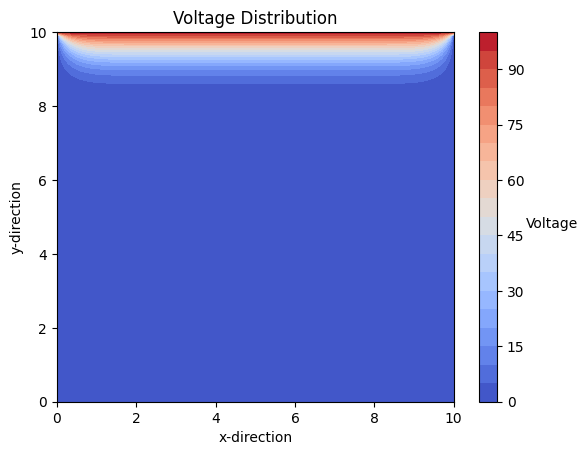

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Total no. of grid points
N=101
iteration=100
L=10                        #Length of the 2D surface
#Boundary and Initial conditions at boundaries and top surface of the plane
u=np.zeros((N,N))         
u[N-1,:]=100                #Top surface at 100 V, this is the last row in the matrix since it has the maximum row index which corresponding to top surface in right-handed cartesian coordinate system         		          

E=[]
for _ in range(iteration):
    u0=u.copy()	            #Store old values for error calculation
    
    #updating the array using four nearby points with the old values of the entire matrix
    u[1:-1,1:-1]=0.25*(u[2:,1:-1]+u[:-2,1:-1]+u[1:-1,2:]+u[1:-1,:-2])
			
    err=np.sum(abs(u-u0))
    E.append(err)

#For plotting of the error with iterations
plt.plot(range(1,iteration+1),E,'r-',lw=1)
plt.title('Error with increase in number of iterations')
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()

#3D plotting
x=np.linspace(0,L,N)
y=np.linspace(0,L,N)
X,Y=np.meshgrid(x,y)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,u,cmap='coolwarm')
ax.set_title("Solution of Laplace's Equation in 2D")
ax.set_xlabel('$X$',fontsize=10,rotation=170)
ax.set_ylabel('$Y$',fontsize=10)
ax.set_zlabel('$Voltage$',fontsize=10,rotation=60)
plt.show()


#Contour plotting and colour mapping
colourMap=plt.cm.coolwarm
colorinterpolation=20
plt.title('Voltage Distribution')
x=np.linspace(0,L,N)
y=np.linspace(0,L,N)
X,Y=np.meshgrid(x, y)
X,Y=np.meshgrid(x,y)
plt.xlabel('x-direction')
plt.ylabel('y-direction')
cf=plt.contourf(X,Y,u,colorinterpolation,cmap=colourMap)
cbar=plt.colorbar(cf)
'''
img=plt.imshow(u,cmap='coolwarm',origin='lower',extent=[0,L,0,L])  #cmap='viridis'
plt.colorbar(img,label='Voltage')
'''
cbar.set_label('Voltage',rotation=0,labelpad=20) 
plt.show()